# Week 4 Code Along

This notebook deals almost exclusively with categorical variables and how to include them in our regression models.

***Note:***

This is a fake dataset and is only for demonstration purposes.

In [73]:
library(ggplot2)

In [74]:
edsal_df <- read.csv('EDSAL.csv')
head(edsal_df, 10)

Education,Experience,Salary
HS,2,34.43222
HS,14,59.15737
HS,36,113.27017
HS,16,69.14739
HS,36,106.01556
HS,33,58.63413
HS,36,101.08130
HS,8,51.32871
HS,3,58.19683
HS,21,77.96433


In [75]:
str(edsal_df)

'data.frame':	300 obs. of  3 variables:
 $ Education : Factor w/ 3 levels "GRAD","HS","UG": 2 2 2 2 2 2 2 2 2 2 ...
 $ Experience: int  2 14 36 16 36 33 36 8 3 21 ...
 $ Salary    : num  34.4 59.2 113.3 69.1 106 ...


`Factor` is the R term for categorical variables.

## Salary Vs. Experience

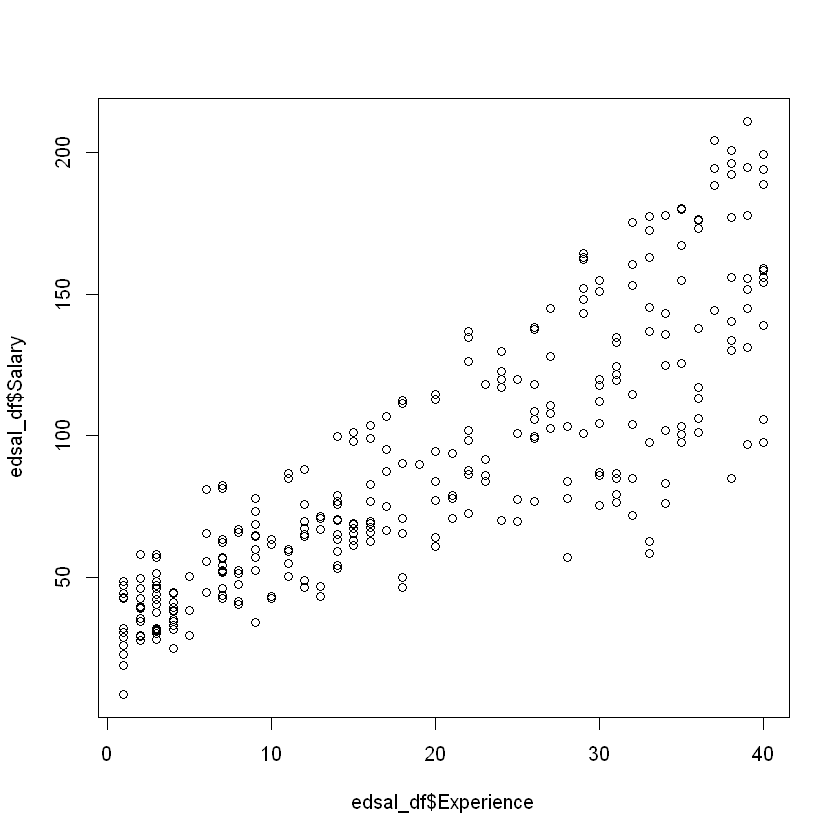

In [76]:
plot(edsal_df$Experience, edsal_df$Salary)

The greater the experience, the greater the salary.

In [77]:
salary_v_experience_lm <- lm(Salary~Experience, edsal_df)

$Salary = b_{0} + b_{1}Experience$

In [78]:
summary(salary_v_experience_lm)


Call:
lm(formula = Salary ~ Experience, data = edsal_df)

Residuals:
   Min     1Q Median     3Q    Max 
-73.00 -12.82  -1.18  13.32  60.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.4679     2.5673   11.48   <2e-16 ***
Experience    3.0959     0.1113   27.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.05 on 298 degrees of freedom
Multiple R-squared:  0.7218,	Adjusted R-squared:  0.7209 
F-statistic: 773.2 on 1 and 298 DF,  p-value: < 2.2e-16


With an adjusted R-squared of 0.7209, we can see that Experience seems to be a good predictor for salary. This is an easy comparison to do as both values are continuous in nature. This begs the question - how do we include categorical variables in our regression models? Interpretted literally, we can see that for each additional year of experience, we can expect a $3090 increase in salary.

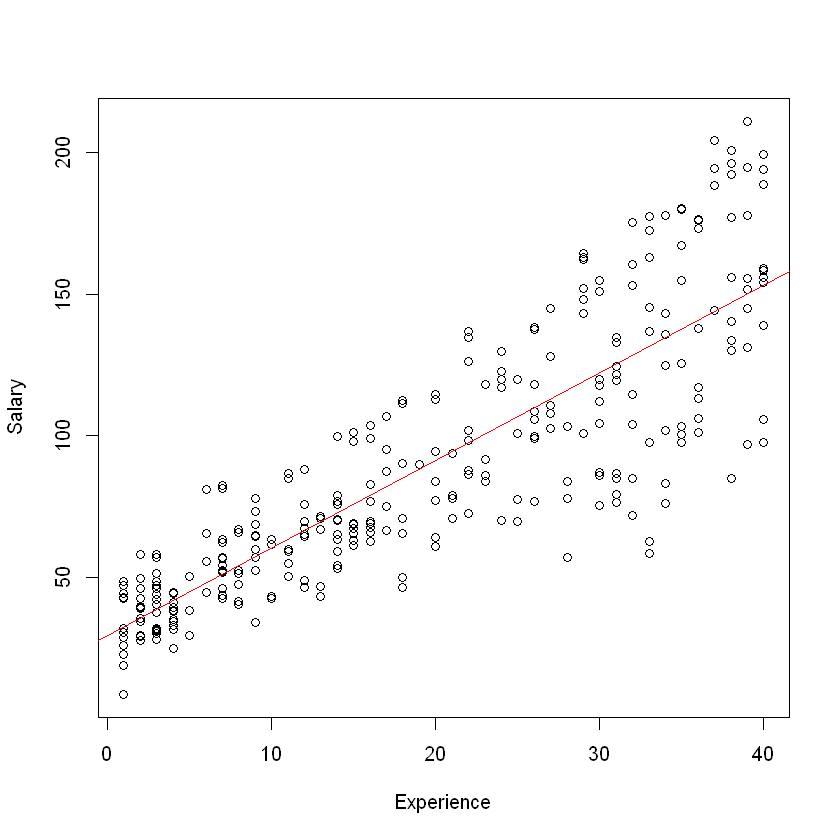

In [79]:
with(edsal_df,plot(Experience, Salary))
abline(salary_v_experience_lm, col="red")

## "One-hot" encoding categorical variables

To use categorical variables in a regression model we must first represent them using dummy variables. To do this we must first define a "base case", then add columns to our dataset that as a whole, use this "base case" to replace the categorical variable.

In [80]:
unique(edsal_df$Education)

[1] HS   UG   GRAD
Levels: GRAD HS UG

We have three unique categories or Factors for our `Education` column. They are shown above. Given $n$ number of possible values in a categorical variable, we must create $n-1$ dummy variables to replace the categorical variable. In our case, we must create two dummy variables. Our dummy variables are binary in nature - that is they may only take on a value of 0 or 1.

The "base case" refers to the case where all of our dummy variables are set equal to 0. Let's use `Education` = *UG* for our base case. We can use a truth table to describe our dummy variables:

| Education | Education_HS | Education_GRAD |
| --- | --- | --- |
| UG | 0 | 0 |
| HS | 1 | 0 |
| GRAD | 0 | 1 |

In [81]:
edsal_df$Education_HS <- ifelse(edsal_df$Education == "HS", 1, 0)
edsal_df$Education_GRAD <- ifelse(edsal_df$Education == "GRAD", 1, 0)

We are now ready to include the effects of the highest education level obtained by an individual into our linear regression model!

## Salary Vs. Education

In [82]:
salary_v_education_lm <- lm(Salary~Education_HS+Education_GRAD, edsal_df)

$Salary = b_{0} + b_{1}HS + b_{2}GRAD$

In [83]:
summary(salary_v_education_lm)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),87.92324,4.062096,21.64480,5.123948e-63
Education_HS,-22.48734,5.759015,-3.90472,1.168115e-04
Education_GRAD,27.51819,5.773612,4.76620,2.943242e-06


In [84]:
summary(salary_v_education_lm)$coefficients[3]

[1] 27.51819

So how do we interpret these results? The ***(Intercept)*** in this case corresponds to our *base case* - that is an individual who's highest level of education obtained is an undergraduate degree.

Since $$Salary = b_{0} + b_{1}HS + b_{2}GRAD$$

and the intercept occurs when $b_{1}=0$ and $b_{2}=0$, we expect someone with an undergraduate degree to have an average salary of $87.92k.

We expect someone with a high school degree to have an average salary of $b_{0} + b_{1} = 87.92 + (-22.49) = 65.43$ or $65.43k.

Similarly, we can expect someone with a graduate degree to have an average salary of $b_{0} + b_{2} = 87.92 + 27.52 = 115.44$ or $115.44k.

Remember - these are **average** values.

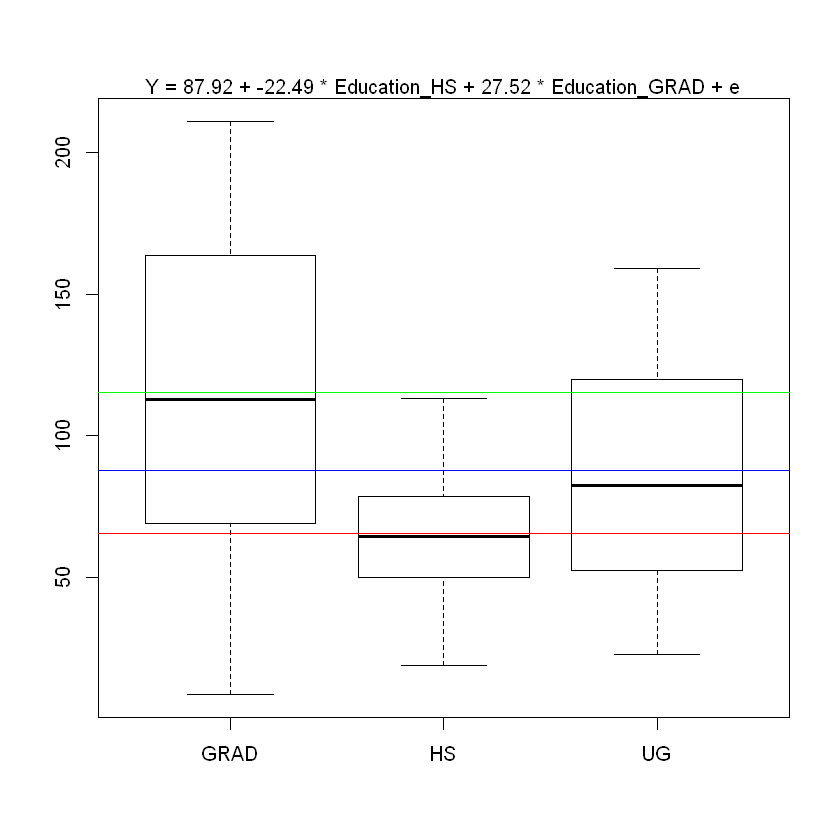

In [152]:
with(edsal_df,plot(Education, Salary))
abline(h=summary(salary_v_education_lm)$coefficients[1], col="blue")
abline(h=summary(salary_v_education_lm)$coefficients[1] + summary(salary_v_education_lm)$coefficients[2], col="red")
abline(h=summary(salary_v_education_lm)$coefficients[1] + summary(salary_v_education_lm)$coefficients[3], col="green")
cc <- coef(salary_v_education_lm)
eqn <- paste("Y =", paste(round(cc[1],2), paste(round(cc[-1],2), names(cc[-1]), sep=" * ", collapse=" + "), sep=" + "), "+ e")
mtext(eqn, 3)

We can overlay these values on a box-whisker plot. The green line is for average graduate salary, red line for HS salary, and the blue line for undergraduate salary.

***Note:***

We do not need to explicitly create dummy variables to do linear regression in R. We could just as easily pass our Factor variable into the model directly as shown below:

In [86]:
summary(lm(Salary~Education, edsal_df))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),115.44142,4.102922,28.136393,9.117194e-86
EducationHS,-50.00553,5.787884,-8.639691,3.536470e-16
EducationUG,-27.51819,5.773612,-4.766200,2.943242e-06


However, this is dangerous as R will automatically choose a base case for us! It's not a big deal with only two or three categorical variables, but with many categorical variables it can be easy to lose track of what your base or reference case is. To automatically draw our truth table we can simply call the R function `contrasts` on our categorical column:

In [87]:
contrasts(edsal_df$Education)

,HS,UG
GRAD,0,0
HS,1,0
UG,0,1


## Salary Vs. Education + Experience

In [88]:
salary_v_education_experience_lm <- lm(Salary~Experience + Education_HS+Education_GRAD, edsal_df)

$Salary = b_{0} + b_{1}Experience + b_{2}HS + b_{3}GRAD$

In [89]:
summary(salary_v_education_experience_lm)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),28.358742,2.34783822,12.078661,1.405221e-27
Experience,2.970871,0.08011239,37.083790,2.822442e-113
Education_HS,-15.061634,2.43603448,-6.182849,2.084640e-09
Education_GRAD,25.924750,2.43432338,10.649674,1.235379e-22


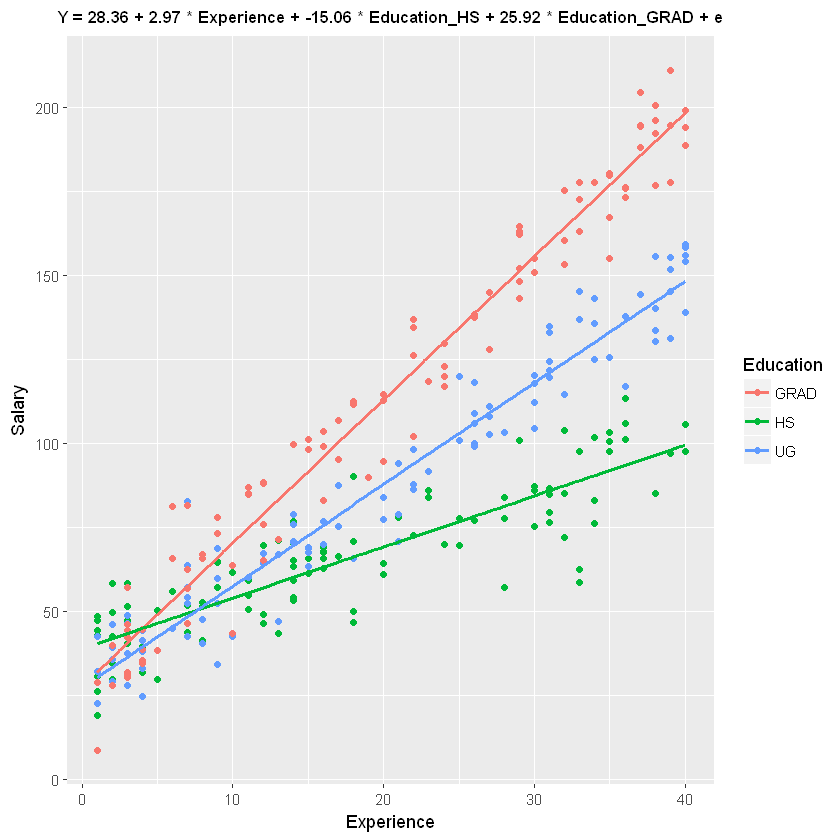

In [90]:
cc <- coef(salary_v_education_experience_lm)
eqn <- paste("Y =", paste(round(cc[1],2), paste(round(cc[-1],2), names(cc[-1]), sep=" * ", collapse=" + "), sep=" + "), "+ e")
ggplot(edsal_df, aes(x=Experience, y=Salary, col=Education)) + geom_point() +
            geom_smooth(method="lm", se=FALSE) + ggtitle(eqn) + theme(plot.title = element_text(size = 10, face = "bold", hjust = 0.5))

The thing to note here is that all three lines have the same slope given by $b_{1} = 2.971$. So the average salary for an undergraduate with no experience boils down to $Salary = b_{0} = 28.36$ or $28.36k.

## Interaction terms

In the model above we assumed that slope was constant amongst the three categories of education. In reality this may not be the case! Interaction terms can be used to overcome this.

Interaction terms are the product of two variables. Let's introduce two new variables to capture the interaction between education and experience level.

In [91]:
edsal_df$H_Exp <- edsal_df$Education_HS * edsal_df$Experience
edsal_df$G_Exp <- edsal_df$Education_GRAD * edsal_df$Experience

Our new regression model becomes:

$$
Salary = b_{0} + b_{1}Experience + b_{2}HS + b_{3}GRAD + b_{4}H_Exp + b_{5}G_Exp
$$

In [92]:
interactions_lm <- lm(Salary~Experience + Education_HS+Education_GRAD+H_Exp+G_Exp, edsal_df)

In [93]:
summary(interactions_lm)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),27.3347710,1.91609974,14.2658393,1.888268e-35
Experience,3.0219432,0.08087211,37.3669402,1.110214e-113
Education_HS,11.4755662,2.63965591,4.3473720,1.900948e-05
Education_GRAD,0.3044409,2.75592085,0.1104679,9.121137e-01
H_Exp,-1.5048174,0.11757787,-12.7984746,4.126352e-30
G_Exp,1.2432280,0.11528103,10.7843246,4.554062e-23


How do we interpret the coefficients for `H_Exp` and `G_Exp`? Since they are interaction terms with `Experience`, the coefficient $b_{4}$ for `H_Exp` is the amount we must add to coefficient $b_{1}$ to get the slope for individuals with HS education.

In this example the effect of experience for individuals with HS education is $b_{1} + b_{4} = 3.02 + (-1.50) = 1.52$ or an increase in salary of $1.52k per year of experience. 

Contrast this to the base case effect of experience for individuals with undergraduate experience $b_{1} = 3.02$ or an increase in salary of $3.02k per year of experience.

Graduate degrees take the cake with an increase in salary per year of experience of $b_{1} + b_{5} = 3.02 + 1.24 = 4.26$ or $4.26k.

In [95]:
HS <- function(x){(27.33+11.48)+((3.02+(-1.50))*x)}
UG <- function(x){27.33+(3.02*x)}
GRAD <- function(x){(27.33+0.30)+((3.02+(1.24))*x)}

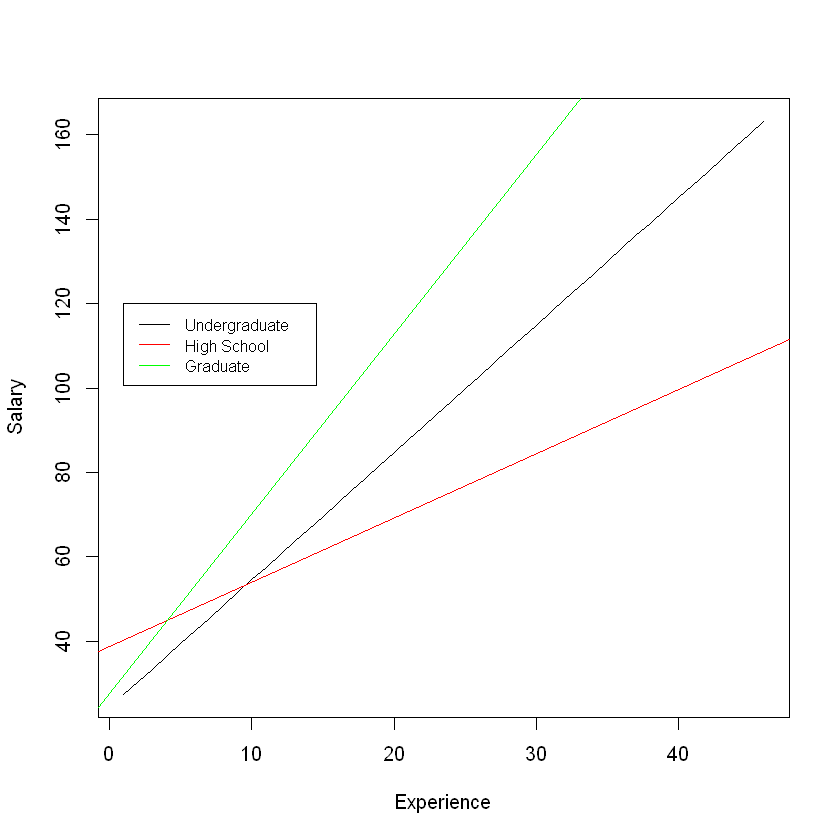

In [109]:
plot(UG(0:45), type='l', xlab="Experience", ylab="Salary")
abline(a=(27.33+11.48), b=(3.02+(-1.50)), col="red")
abline(a=(27.33+0.30), b=(3.02+(1.24)), col="green")
legend(1, 120, legend=c("Undergraduate", "High School", "Graduate"),
       col=c("black", "red", "green"), lty=1:1:1, cex=0.8)

As we can see in this fake dataset, the effects of getting a graduate degree outpace the alternative education options!

## Application

Let's transition to a real world dataset pulled from [insideairbnb.com](http://insideairbnb.com/get-the-data.html) to put what we've learned to use!

reference: https://stackoverflow.com/a/25455968

In [120]:
loadRData <- function(fileName){
#loads an RData file, and returns it
    load(fileName)
    get(ls()[ls() != "fileName"])
}

In [136]:
la_listings <- loadRData("la_listing_full.RData")

Let's subset the dataset to only look at certain columns of interest.

In [137]:
la_listings <- la_listings[c('price','number_of_reviews','beds','bathrooms','accommodates','reviews_per_month', 'room_type', 'review_scores_rating')]

In [138]:
head(la_listings)

price,number_of_reviews,beds,bathrooms,accommodates,reviews_per_month,room_type,review_scores_rating
"$3,000.00",0,5,7,10,NA,Entire home/apt,NA
$50.00,33,1,1,2,1.91,Private room,93
$55.00,14,1,1,2,1.72,Private room,100
$150.00,22,3,1,6,2.12,Entire home/apt,100
$30.00,3,1,1,1,0.18,Private room,93
$35.00,0,1,1,1,NA,Private room,NA


In [140]:
la_listings$price <- as.numeric(gsub('[$,]', '', la_listings$price))
la_listings$room_type <- as.factor(la_listings$room_type)

In [144]:
str(la_listings)

Classes 'tbl_df', 'tbl' and 'data.frame':	31253 obs. of  8 variables:
 $ price               : num  3000 50 55 150 30 35 45 56 350 80 ...
 $ number_of_reviews   : int  0 33 14 22 3 0 38 23 0 42 ...
 $ beds                : int  5 1 1 3 1 1 1 1 1 2 ...
 $ bathrooms           : num  7 1 1 1 1 1 1 NA 1.5 1.5 ...
 $ accommodates        : int  10 2 2 6 1 1 2 2 2 2 ...
 $ reviews_per_month   : num  NA 1.91 1.72 2.12 0.18 NA 7.92 0.41 NA 1.89 ...
 $ room_type           : Factor w/ 3 levels "Entire home/apt",..: 1 2 2 1 2 2 2 2 1 2 ...
 $ review_scores_rating: int  NA 93 100 100 93 NA 98 89 NA 99 ...


Let's subset the dataset to exclude prices greater than $1000.

In [145]:
la_listings <- subset(la_listings, price<=1000)
head(la_listings)

price,number_of_reviews,beds,bathrooms,accommodates,reviews_per_month,room_type,review_scores_rating
50,33,1,1,2,1.91,Private room,93
55,14,1,1,2,1.72,Private room,100
150,22,3,1,6,2.12,Entire home/apt,100
30,3,1,1,1,0.18,Private room,93
35,0,1,1,1,NA,Private room,NA
45,38,1,1,2,7.92,Private room,98


Now we're ready to conduct our analysis!

In particular let's focus on the dependent variable `price` and begin to ask questions like:

* If the property `accommodates` more people, is the `price` greater?
* Does the `room_type` have an effect on price?

## Airbnb model 1

$price = b_{0} + b_{1}accommodates$

In [147]:
airbnb1 <- lm(price~accommodates,la_listings)
summary(airbnb1)


Call:
lm(formula = price ~ accommodates, data = la_listings)

Residuals:
    Min      1Q  Median      3Q     Max 
-549.31  -46.40  -16.95   22.05  937.50 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   28.0423     1.0591   26.48   <2e-16 ***
accommodates  34.4540     0.2604  132.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 106.5 on 30779 degrees of freedom
Multiple R-squared:  0.3625,	Adjusted R-squared:  0.3625 
F-statistic: 1.75e+04 on 1 and 30779 DF,  p-value: < 2.2e-16


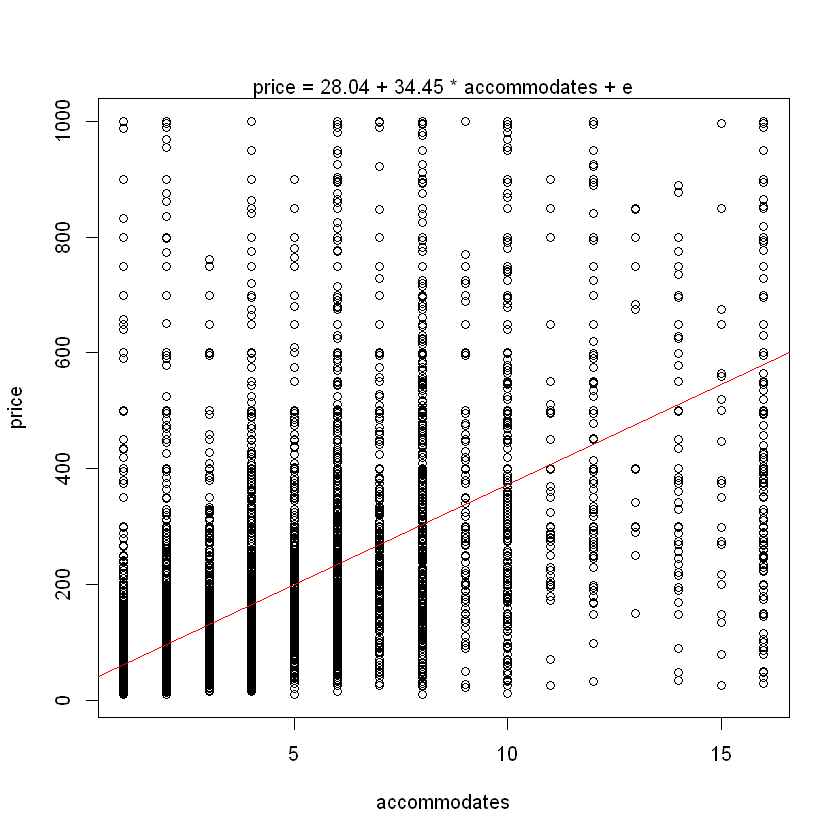

In [154]:
with(la_listings,plot(accommodates, price))
abline(airbnb1, col="red")
cc <- coef(airbnb1)
eqn <- paste("price =", paste(round(cc[1],2), paste(round(cc[-1],2), names(cc[-1]), sep=" * ", collapse=" + "), sep=" + "), "+ e")
mtext(eqn, 3)

It makes sense that a property owner will charge more if they have more rooms available!

## Airbnb model 2

$price = b_{0} + b_{1}room\_type$

First we need to make our dummy variables! Let's call the `contrasts` function and use the R selected base case.

In [155]:
contrasts(la_listings$room_type)

,Private room,Shared room
Entire home/apt,0,0
Private room,1,0
Shared room,0,1


Entire home/apt is the base case selected by R.

In [156]:
airbnb2 <- lm(price~room_type,la_listings)
summary(airbnb2)


Call:
lm(formula = price ~ room_type, data = la_listings)

Residuals:
    Min      1Q  Median      3Q     Max 
-183.16  -63.16  -20.16   14.89  938.91 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            193.1584     0.9052  213.39   <2e-16 ***
room_typePrivate room -113.0462     1.4349  -78.78   <2e-16 ***
room_typeShared room  -145.0683     3.1042  -46.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 119.9 on 30778 degrees of freedom
Multiple R-squared:  0.1913,	Adjusted R-squared:  0.1913 
F-statistic:  3641 on 2 and 30778 DF,  p-value: < 2.2e-16


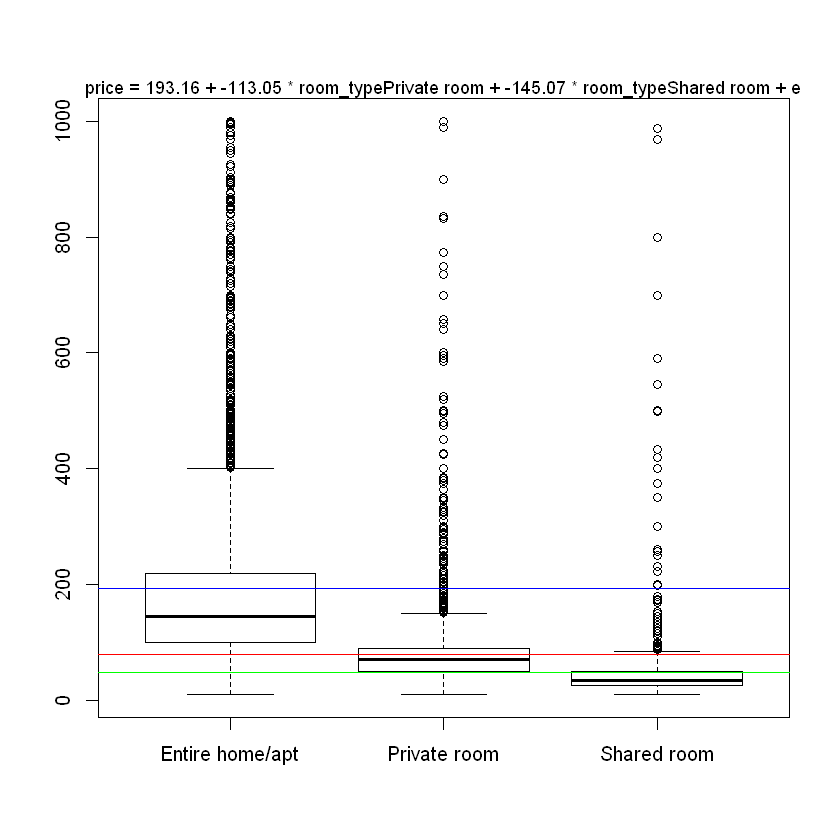

In [158]:
with(la_listings,plot(room_type, price))
abline(h=summary(airbnb2)$coefficients[1], col="blue")
abline(h=summary(airbnb2)$coefficients[1] + summary(airbnb2)$coefficients[2], col="red")
abline(h=summary(airbnb2)$coefficients[1] + summary(airbnb2)$coefficients[3], col="green")
cc <- coef(airbnb2)
eqn <- paste("price =", paste(round(cc[1],2), paste(round(cc[-1],2), names(cc[-1]), sep=" * ", collapse=" + "), sep=" + "), "+ e")
mtext(eqn, 3, cex=0.9)

Thus we expect an Entire home/apt to get on average $b_{0}=$ $193.16 per night.

Thus we expect a Private room to get on average $b_{0} + b_{1}=193.16+(-113.05)$ or $80.11 per night.

And we expect a Shared room to get on average $b_{0} + b_{2}=193.16+(-145.07)$ or $48.09 per night.

## Airbnb model 3

$price = b_{0} + b_{1}accommodates + b_{2}room\_type$

In [161]:
airbnb3 <- lm(price~accommodates+room_type,la_listings)
summary(airbnb3)


Call:
lm(formula = price ~ accommodates + room_type, data = la_listings)

Residuals:
    Min      1Q  Median      3Q     Max 
-449.65  -45.92  -12.98   20.02  970.49 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            68.0060     1.4585   46.63   <2e-16 ***
accommodates           29.2280     0.2873  101.72   <2e-16 ***
room_typePrivate room -48.4788     1.3943  -34.77   <2e-16 ***
room_typeShared room  -80.7194     2.7590  -29.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 103.7 on 30777 degrees of freedom
Multiple R-squared:  0.3948,	Adjusted R-squared:  0.3947 
F-statistic:  6692 on 3 and 30777 DF,  p-value: < 2.2e-16


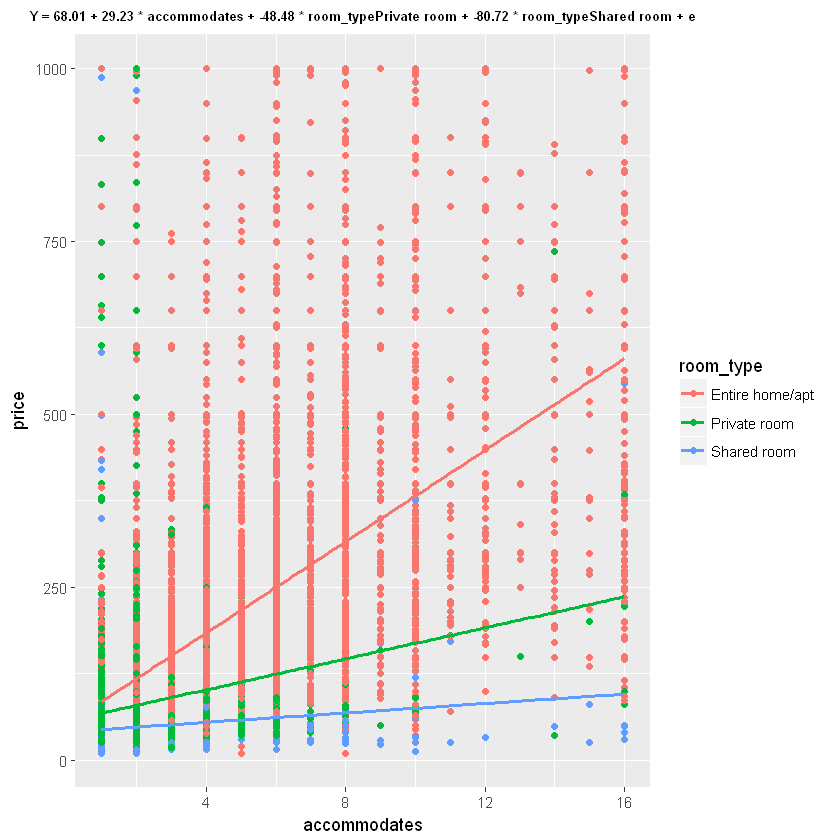

In [163]:
cc <- coef(airbnb3)
eqn <- paste("Y =", paste(round(cc[1],2), paste(round(cc[-1],2), names(cc[-1]), sep=" * ", collapse=" + "), sep=" + "), "+ e")
ggplot(la_listings, aes(x=accommodates, y=price, col=room_type)) + geom_point() +
            geom_smooth(method="lm", se=FALSE) + ggtitle(eqn) + theme(plot.title = element_text(size = 8, face = "bold", hjust = 0.5))

Notice all three lines have slope $b_{1}=\$29.23$ for each additional room.